# Flux at LGS channel

In [1]:
import numpy as np
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
from arte.photometry.morfeo_transmissive_systems import MorfeoLgsChannelTransmissiveSystem_002

  points: [3800. 3900. 4000. 4100. 4200. 4300. 4400. 4500. 4600. 4700. 4800. 4900.
 5000. 5100. 5200. 5300. 5400. 5500.]
  lookup_table: [-1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16] [synphot.models]


Flux at 0.589 μm: 604.9218284246432 ph/subap/frame


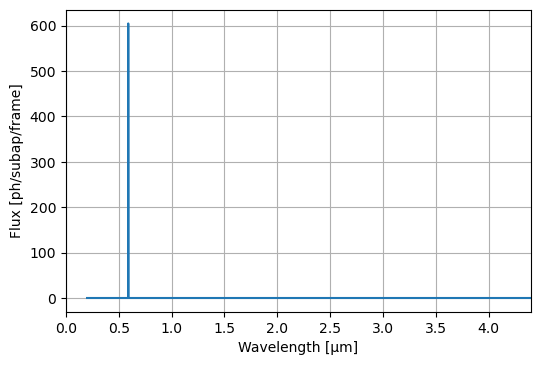

In [2]:
flux_at_M1 = 4.4e6 * u.ph/u.m**2/u.s
D_M1 = 38.54 * u.m
N_subap = 68
T = 2 * u.ms
lgs_ch = MorfeoLgsChannelTransmissiveSystem_002()
waveset = lgs_ch.transmittance.waveset
lgs_transmittance = lgs_ch.transmittance(waveset)

flux_at_lgs = flux_at_M1 * lgs_transmittance * T.to(u.s) * (D_M1 / N_subap)**2

mpl.rcParams['figure.dpi'] = 100
plt.plot(waveset.to(u.um), flux_at_lgs)
plt.grid()
plt.ylabel('Flux [ph/subap/frame]')
plt.xlabel('Wavelength [μm]')
plt.xlim(0, 4.4)
print('Flux at 0.589 μm: %s ph/subap/frame' %flux_at_lgs[np.argmax(flux_at_lgs)].value)

In [3]:
#With Cedric's transmission
flux_at_M1 * 0.1927 * T.to(u.s) * (D_M1 / N_subap)**2

<Quantity 544.71581185 ph>

In [4]:
#With version 001 of MorfeoLgsChannelTransmissiveSystem
from arte.photometry.morfeo_transmissive_systems import MorfeoLgsChannelTransmissiveSystem_001

lgs_ch_2 = MorfeoLgsChannelTransmissiveSystem_001()
waveset_2 = lgs_ch_2.transmittance.waveset
lgs_transmittance_2 = lgs_ch_2.transmittance(waveset_2)

flux_at_lgs_2 = flux_at_M1 * lgs_transmittance_2 * T.to(u.s) * (D_M1 / N_subap)**2
flux_at_lgs_2.max()

  points: [3800. 3900. 4000. 4100. 4200. 4300. 4400. 4500. 4600. 4700. 4800. 4900.
 5000. 5100. 5200. 5300. 5400. 5500.]
  lookup_table: [-1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16] [synphot.models]


<Quantity 521.3839164 ph>